# Instacart Market Basket Analysis

## Objective

To explore the datasets and see how customers are purchasing products and identifying trends. Using various methods of data exploration and visualization.

## Table of Contents

1. Importing the libraries and datasets
2. Data Overview
3. Data Preparation
4. Exploratory Data Analysis

## Importing the libraries and datasets

The first step is to import the libraries and datasets.

**Libraries:** pandas, matplotlib, seaborn

**Datasets:** aisles, departments, order_products, orders, products


    


    
For this project, you’ll work with data from Instacart.

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

Your mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.

</div>

In [3]:
import pandas as pd

In [7]:
instacart_orders = pd.read_csv('instacart_orders.csv', sep=';')

In [9]:
products = pd.read_csv('products.csv', sep=';')

In [11]:
order_products = pd.read_csv('order_products.csv', sep=';')

In [13]:
aisles = pd.read_csv('aisles.csv', sep=';')

In [15]:
departments = pd.read_csv('departments.csv', sep=';')

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [16]:
# Check for duplicated orders
instacart_orders.duplicated().sum()

np.int64(15)

In [17]:
# Check for all orders placed Wednesday at 2:00 AM
instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [18]:
# Remove duplicate orders
instacart_orders = instacart_orders.drop_duplicates()

In [19]:
# Double check for duplicate rows
print("instacart_orders duplicate rows:", instacart_orders.duplicated().sum())

instacart_orders duplicate rows: 0


In [75]:
# Double check for duplicate order IDs only
instacart_orders['order_id'].duplicated().sum()

np.int64(0)

### `products` data frame

In [76]:
# Check for fully duplicate rows
products.duplicated().sum()

np.int64(0)

In [77]:
# Check for just duplicate product IDs
products['product_id'].duplicated().sum()

np.int64(0)

In [78]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()

np.int64(1361)

In [79]:
# Check for duplicate product names that aren't missing
products[products['product_name'].notna()]['product_name'].duplicated().sum()

np.int64(1257)

### `departments` data frame

In [80]:
departments.duplicated().sum()

np.int64(0)

In [81]:
departments['department_id'].duplicated().sum()

np.int64(0)

### `aisles` data frame

In [82]:
aisles.duplicated().sum()

np.int64(0)

In [83]:
aisles['aisle_id'].duplicated().sum()

np.int64(0)

### `order_products` data frame

In [84]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

np.int64(0)

In [85]:
# Double check for any other tricky duplicates
order_products.duplicated(subset=['order_id', 'product_id']).sum()

np.int64(0)

## Find and remove missing values


### `products` data frame

In [86]:
products['product_name'].isna().sum()

np.int64(0)

In [87]:
# Are all of the missing product names associated with aisle ID 100?
products[products['product_name'].isna()]['aisle_id'].value_counts()

Series([], Name: count, dtype: int64)

In [88]:
# Are all of the missing product names associated with department ID 21?
products[products['product_name'].isna()]['department_id'].value_counts()

Series([], Name: count, dtype: int64)

In [89]:
# What is this ailse and department?
aisles[aisles['aisle_id'] == 100], departments[departments['department_id'] == 21]

(    aisle_id    aisle
 99       100  missing,
     department_id department
 20             21    missing)

In [90]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

C:\Users\INVERSE\AppData\Local\Temp\ipykernel_37856\1337780856.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_name'].fillna('Unknown', inplace=True)


### `orders` data frame

In [91]:
instacart_orders['days_since_prior_order'].isna().sum()

np.int64(28817)

In [92]:
# Are there any missing values where it's not a customer's first order?
instacart_orders[instacart_orders['days_since_prior_order'].isna()]['order_number'].value_counts()

order_number
1    28817
Name: count, dtype: int64

### `order_products` data frame

In [93]:
order_products['add_to_cart_order'].isna().sum()

np.int64(0)

In [94]:
# What are the min and max values in this column?
order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max()

(np.int64(1), np.int64(999))

In [95]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_with_missing = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
orders_with_missing

array([], dtype=int64)

In [96]:
# Do all orders with missing values have more than 64 products?
order_products[order_products['order_id'].isin(orders_with_missing)].groupby('order_id').size().min()

nan

In [97]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [98]:
instacart_orders['order_hour_of_day'].min(), instacart_orders['order_hour_of_day'].max()

(np.int64(0), np.int64(23))

In [99]:
instacart_orders['order_dow'].min(), instacart_orders['order_dow'].max()

(np.int64(0), np.int64(6))

### [A2] What time of day do people shop for groceries?

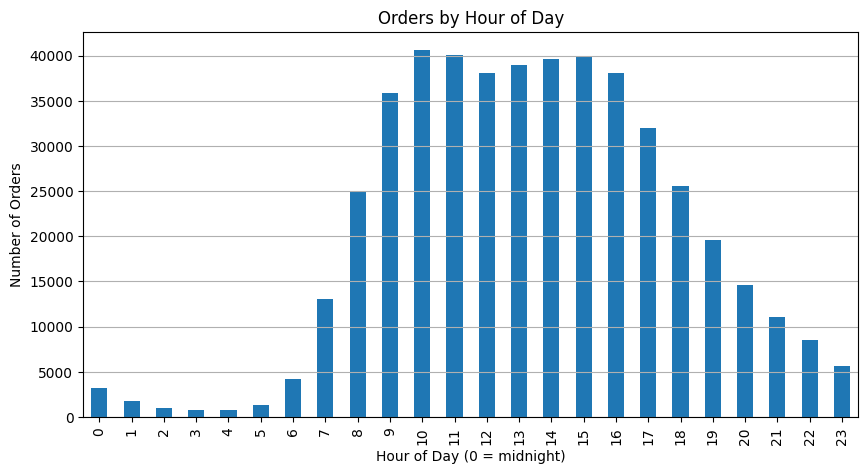

In [100]:
import matplotlib.pyplot as plt

instacart_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day (0 = midnight)")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.show()


chart shows that most people shop for groceries between late morning and early afternoon, with order volume peaking between 10 AM and 2 PM. Activity starts to increase significantly around 8 AM and gradually declines after 3 PM, with the fewest orders placed during the late-night and early-morning hours. This suggests that grocery shopping is most popular during typical daytime hours when people are more likely to be active and available

### [A3] What day of the week do people shop for groceries?

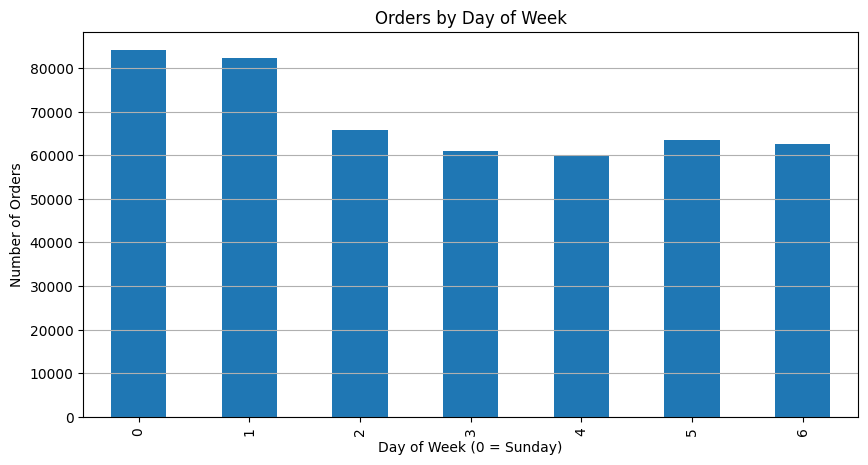

In [101]:
instacart_orders['order_dow'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week (0 = Sunday)")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.show()

This shows the customer order activity is highest on Sundays (Day 0) and Mondays (Day 1), with a gradual decline as the week progresses. The lowest number of orders occurs on Wednesday (Day 3) and Thursday (Day 4), before slightly picking up again toward the weekend. This pattern suggests that customers are most active at the beginning of the week, possibly after weekend planning or restocking, and less active midweek. Businesses could use this insight to adjust inventory, staffing, and marketing strategies to match periods of higher and lower demand.

### [A4] How long do people wait until placing another order?

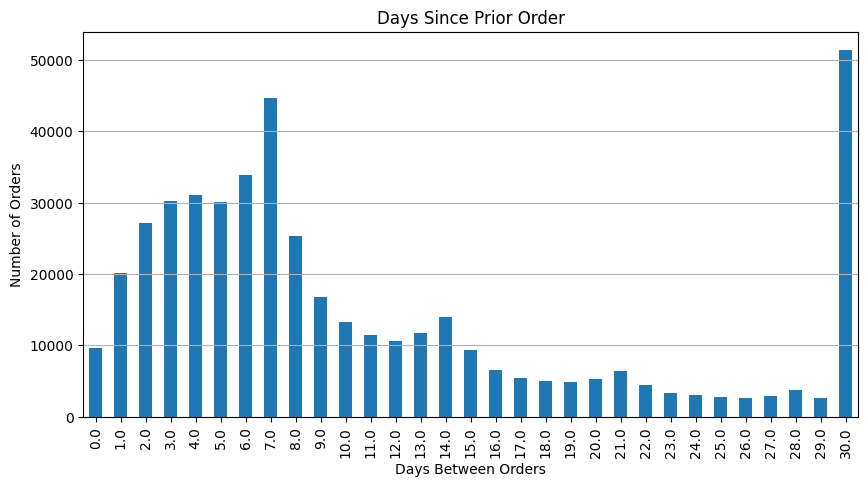

In [102]:
instacart_orders['days_since_prior_order'].dropna().value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Days Since Prior Order")
plt.xlabel("Days Between Orders")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.show()

Most customers ussually try to reorder, within 7 days, with a noticeable peak on the 7th day. There is also a significant spike at the 30-day mark

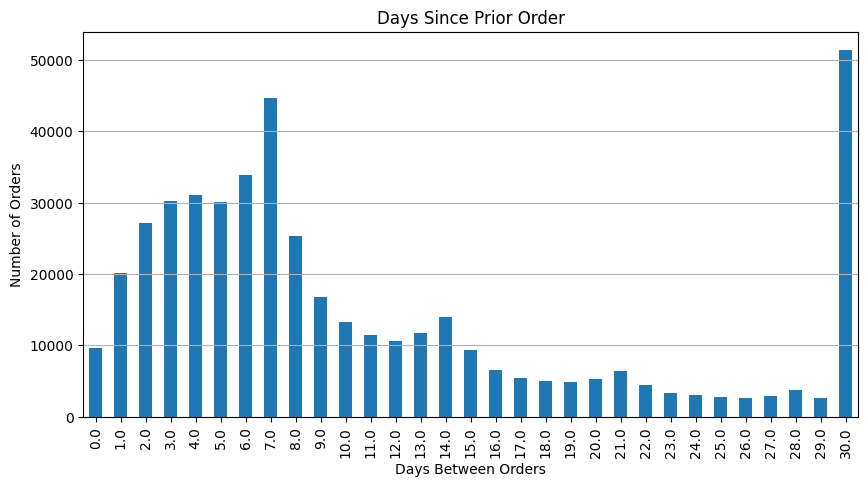

In [103]:
instacart_orders['days_since_prior_order'].dropna().value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Days Since Prior Order")
plt.xlabel("Days Between Orders")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.show()

Most customers reorder within 7 days, with the highest peak exactly at 7 days. A second major spike occurs at 30 days, suggesting a group of monthly repeat customer

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [104]:
import matplotlib.pyplot as plt

In [105]:
wed_orders = instacart_orders[instacart_orders['order_dow'] == 3]['order_hour_of_day']

In [106]:
sat_orders = instacart_orders[instacart_orders['order_dow'] == 6]['order_hour_of_day']

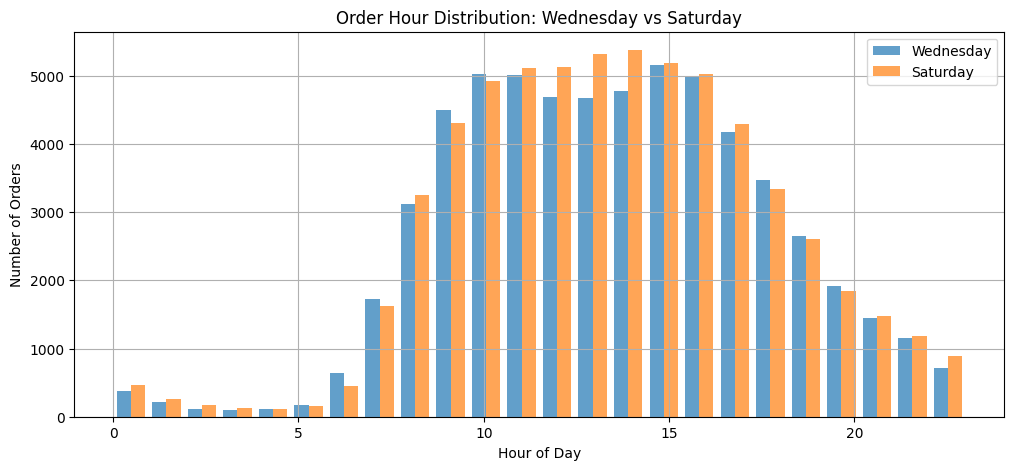

In [107]:
plt.figure(figsize=(12,5))
plt.hist([wed_orders, sat_orders], bins=24, label=['Wednesday', 'Saturday'], alpha=0.7)
plt.title("Order Hour Distribution: Wednesday vs Saturday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.legend()
plt.grid(True)
plt.show()

The orders on both Wednesday and Saturday peak between 10 AM and 3 PM, with Saturday showing slightly higher order volumes during these hours. Early morning and late-night order activity remains low on both of the day.

### [B2] What's the distribution for the number of orders per customer?

In [108]:
user_order_counts = instacart_orders['user_id'].value_counts()

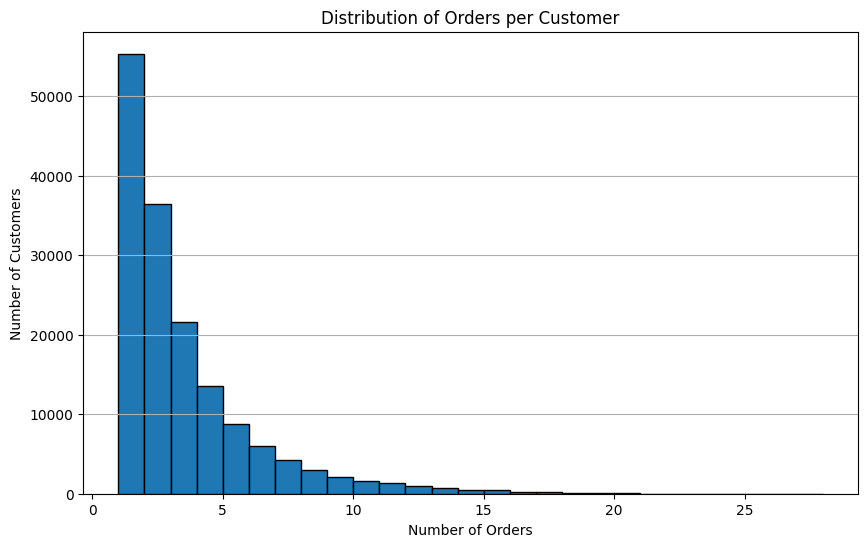

In [109]:
plt.figure(figsize=(10, 6))
plt.hist(user_order_counts, bins=range(1, user_order_counts.max() + 1), edgecolor='black')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

Majority of customers have placed only a small number of orders, with one or two orders being the most common. As the number of orders increases, the number of customers decreases sharply. This indicates that a small group of loyal customers makes frequent repeat purchases.

### [B3] What are the top 20 popular products (display their id and name)?

In [110]:
top_products = order_products['product_id'].value_counts().head(20)

In [111]:
top_products_df = top_products.reset_index()
top_products_df.columns = ['product_id', 'order_count']
top_products_df = top_products_df.merge(products[['product_id', 'product_name']], on='product_id')

In [112]:
top_products_df

,product_id,order_count,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


Bananas are the most frequently ordered product, followed by bags of organic bananas and organic strawberries. Fresh fruits and vegetables dominate the top 20 most ordered items, highlighting customer preferences for healthy, perishable foods.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [113]:
items_per_order = order_products.groupby('order_id').size()

In [114]:
import matplotlib.pyplot as plt

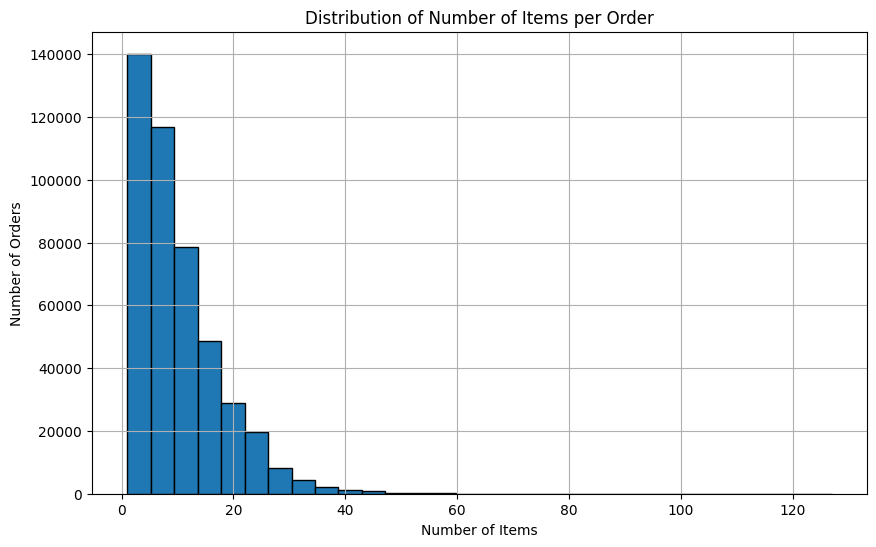

In [115]:
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=30, edgecolor='black')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

Orders contain a small number of items, typically fewer than 10. As the number of items per order increases, the frequency of such orders decreases rapidly.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [116]:
reordered_counts = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20)

In [117]:
top_reordered = pd.DataFrame({'product_id': reordered_counts.index, 'reorder_count': reordered_counts.values})

In [118]:
top_reordered = top_reordered.merge(products[['product_id', 'product_name']], on='product_id')

In [119]:
top_reordered

,product_id,reorder_count,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


Bananas are the most frequently reordered product, followed by bags of organic bananas and organic strawberries. The list is dominated by fresh produce items like fruits, vegetables, and dairy

### [C3] For each product, what proportion of its orders are reorders?

In [120]:
reorder_ratio = order_products.groupby('product_id')['reordered'].mean().reset_index()

In [121]:
reorder_ratio = reorder_ratio.merge(products[['product_id', 'product_name']], on='product_id')

In [122]:
reorder_ratio.rename(columns={'reordered': 'reorder_proportion'}, inplace=True)
reorder_ratio.sort_values(by='reorder_proportion', ascending=False).head(10)

,product_id,reorder_proportion,product_name
28108,30644,1.0,Organic French Roast
7340,8054,1.0,Bissli Smokey Wheat Snacks
28114,30650,1.0,Mushroom Lover's Veggie Burgers
41002,44747,1.0,Frozen Organic Blackberries
40998,44743,1.0,Real Zero Cola
32921,35897,1.0,Ham Hock
32861,35834,1.0,Bulgarian Organic Yogurt
2684,2939,1.0,Cheddar Crunchin' Crackers
20357,22209,1.0,Temples Earl Gray Strong Tea
20361,22213,1.0,2% Reduced Fat Chocolate Milk


### [C4] For each customer, what proportion of their products ordered are reorders?

In [123]:
order_user = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id')
customer_reorder_ratio = order_user.groupby('user_id')['reordered'].mean().reset_index()

In [124]:
customer_reorder_ratio.rename(columns={'reordered': 'reorder_proportion'}, inplace=True)
customer_reorder_ratio.head()

,user_id,reorder_proportion
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571


### [C5] What are the top 20 items that people put in their carts first? 

In [125]:
first_items = order_products[order_products['add_to_cart_order'] == 1]

In [126]:
top_first_items = first_items['product_id'].value_counts().head(20).reset_index()

In [127]:
top_first_items.columns = ['product_id', 'first_added_count']

In [128]:
top_first_items = pd.merge(top_first_items, products[['product_id', 'product_name']], on='product_id')

In [129]:
top_first_items

,product_id,first_added_count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


Data shows that bananas are the top first-added item to carts, with 15,562 customers adding them first. Bags of organic bananas follow with 11,026, and organic whole milk comes next with 4,363. Overall, most of the top 20 first-added items are fresh produce or staple products like milk and water. Items such as organic strawberries (3,946), organic avocados (3,044), and spring water (2,336) also rank highly. This suggests that customers tend to prioritize purchasing fresh fruits, vegetables, and essential everyday goods early in their shopping trip, reflecting a strong focus on healthy and necessary items.

Overall Conclusion: Section A confirmed that our data were clean (hours 0–23, weekdays 0–6) and revealed that orders surge mid-morning, peaking around 10 AM and on Sundays. Customers returning on a 0–30 day cycle (including same-day repeats). In Section B we saw Wednesday’s daytime traffic even edge out Saturday’s. In addition, most shoppers places just about 1 to 5 orders (though a small group orders 20+ times), and fresh produce and dairy such Organic Lemon, Apple Honeycrisp Organic, bananas, berries, avocados, milk are dominating the top 20 products being ordered. Finally, Section C showed baskets average about 8–10 items and that the staple items like bananas register 60–85% repeat rates (and some niche products hit 100%), and also bananas and other produce/dairy are most often the very first items added to carts.